# Ridge Regression

### Ridge Regression is a type of linear regression that includes L2 regularization. It's used to prevent overfitting and handle multicollinearity (when predictors are highly correlated).

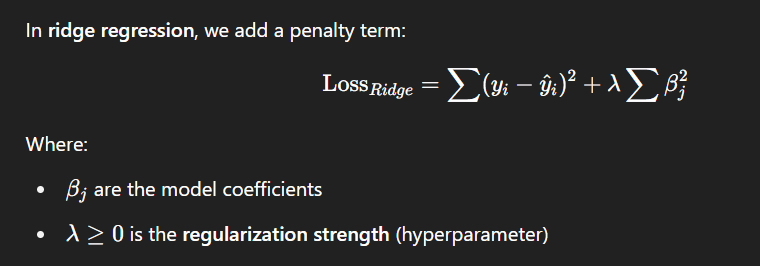

### Beta = Equation parameter ( eg: slope)

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder

In [10]:
weight_array=np.array(np.random.random(10))
size_array=np.array(np.random.random(10))

In [15]:
x_train,x_test,y_train,y_test=train_test_split(weight_array,size_array,test_size=0.8,random_state=42)

In [16]:
print(f'x_train{x_train}')
print(f'x_test{x_test}')
print(f'y_train{y_train}')
print(f'y_test{y_test}')

x_train[0.77385876 0.59355428]
x_test[0.05321283 0.25962585 0.79459775 0.16573621 0.84563599 0.28904199
 0.71782266 0.0127838 ]
y_train[0.45114239 0.47285154]
y_test[0.51223302 0.20198595 0.82574132 0.54846339 0.38295084 0.37677216
 0.40311757 0.10754634]


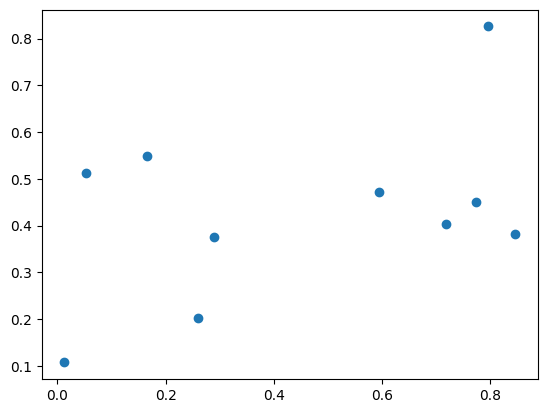

In [17]:
plt.scatter(x=weight_array,y=size_array)

In [20]:
model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
y_pred=model.predict(x_test.reshape(-1,1))

In [30]:
print(model.score(x_train.reshape(-1,1),y_train))

1.0


In [32]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 0.06
Coefficient of determination: -0.34


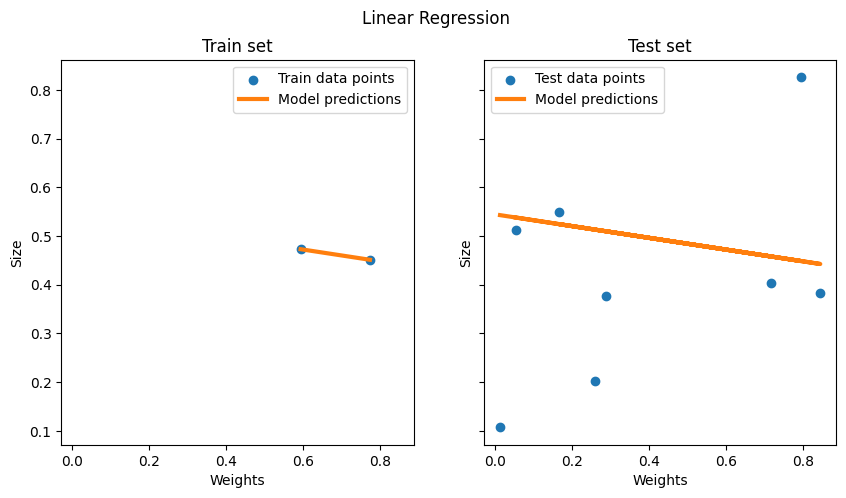

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(x_train, y_train, label="Train data points")
ax[0].plot(
    x_train,
    model.predict(x_train.reshape(-1,1)),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Weights", ylabel="Size", title="Train set")
ax[0].legend()

ax[1].scatter(x_test, y_test, label="Test data points")
ax[1].plot(x_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Weights", ylabel="Size", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

### High Varaince without less bias
### Implementing ridge regression penalty

In [39]:
ridge=Ridge(alpha=1.0)
ridge.fit(x_train.reshape(-1,1),y_train)
y_pred_ridge=ridge.predict(x_test.reshape(-1,1))

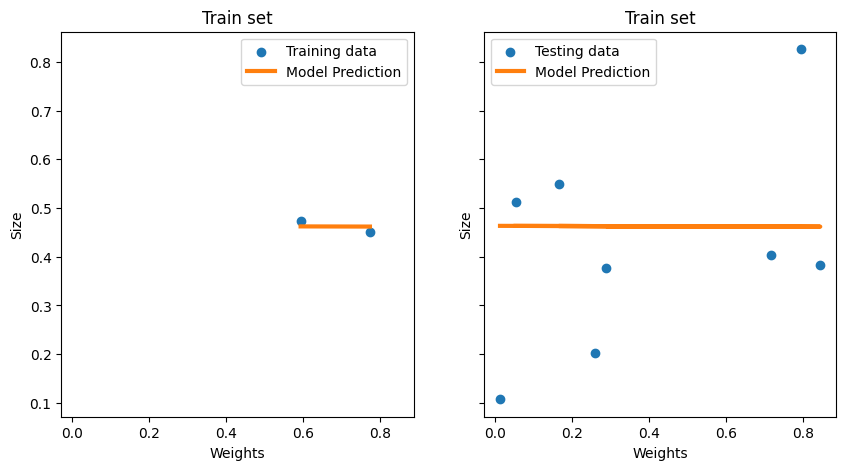

In [43]:
fig,ax=plt.subplots(ncols=2,figsize=(10,5),sharex=True,sharey=True)
ax[0].scatter(x_train,y_train,label='Training data')
ax[0].plot(
    x_train,
    ridge.predict(x_train.reshape(-1,1)),
    linewidth=3,
    color='tab:orange',
    label='Model Prediction')
ax[0].set(xlabel="Weights", ylabel="Size", title="Train set")
ax[0].legend()

ax[1].scatter(x_test,y_test,label='Testing data')
ax[1].plot(
    x_test,
    y_pred_ridge,
    linewidth=3,
    color='tab:orange',
    label='Model Prediction')
ax[1].set(xlabel="Weights", ylabel="Size", title="Train set")
ax[1].legend()

In [44]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred_ridge):.2f}")

Mean squared error: 0.04
Coefficient of determination: -0.05


### Low bias and Low variance


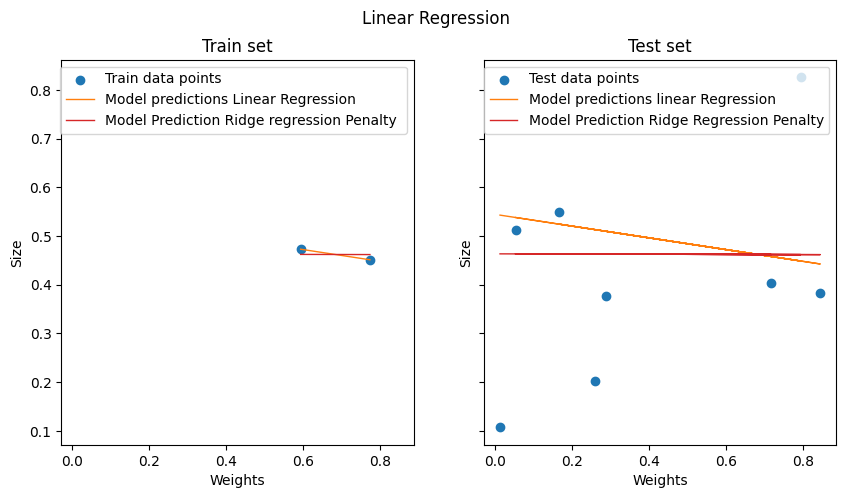

In [48]:
 # Both Plot to compare 
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(x_train, y_train, label="Train data points")
ax[0].plot( # Original Line
    x_train,
    model.predict(x_train.reshape(-1,1)),
    linewidth=1,
    color="tab:orange",
    label="Model predictions Linear Regression",
)
ax[0].plot( # ridge regression penalty
    x_train,
    ridge.predict(x_train.reshape(-1,1)),
    linewidth=1,
    color='tab:red',
    label='Model Prediction Ridge regression Penalty ')
ax[0].set(xlabel="Weights", ylabel="Size", title="Train set")
ax[0].legend()

ax[1].scatter(x_test, y_test, label="Test data points")
ax[1].plot(x_test, y_pred, linewidth=1, color="tab:orange", label="Model predictions linear Regression")
ax[1].plot(
    x_test,
    y_pred_ridge,
    linewidth=1,
    color='tab:red',
    label='Model Prediction Ridge Regression Penalty')
ax[1].set(xlabel="Weights", ylabel="Size", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

In [65]:
# Automatically finds best alpha using cross-validation
ridge_cv = RidgeCV(alphas=[1,2,3,4], cv=LeaveOneOut()) # cv=no.of cross validation
ridge_cv.fit(x_train.reshape(-1,1), y_train)

print("Best alpha:", ridge_cv.alpha_)
# it will work bad with just two sample for training

Best alpha: 1


C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Rahul\AppData\Local\Programs\Python\Python3

In [66]:
x_train,x_test,y_train,y_test=train_test_split(weight_array,size_array,test_size=0.9,random_state=42)

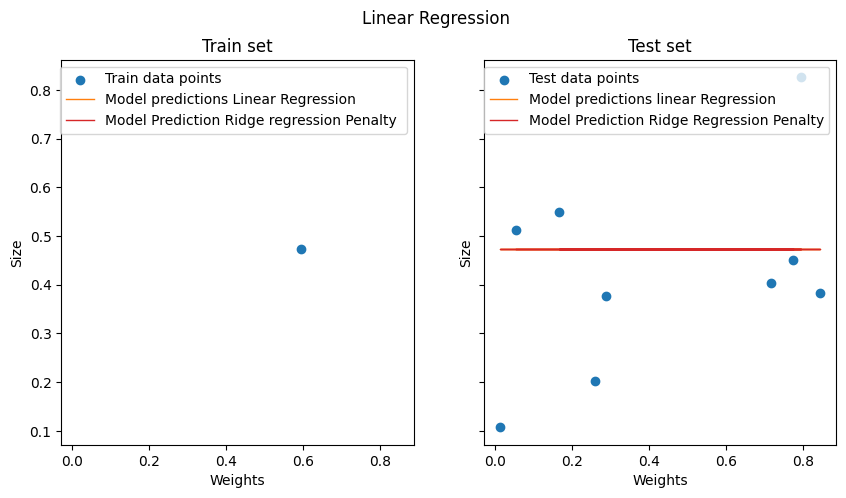

In [71]:
# Linear Regression
model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
y_pred=model.predict(x_test.reshape(-1,1))

#Ridge Regression
ridge=Ridge(alpha=1.0)
ridge.fit(x_train.reshape(-1,1),y_train)
y_pred_ridge=ridge.predict(x_test.reshape(-1,1))

# Both plot
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(x_train, y_train, label="Train data points")
ax[0].plot( # Original Line
    x_train,
    model.predict(x_train.reshape(-1,1)),
    linewidth=1,
    color="tab:orange",
    label="Model predictions Linear Regression",
)
ax[0].plot( # ridge regression penalty
    x_train,
    ridge.predict(x_train.reshape(-1,1)),
    linewidth=1,
    color='tab:red',
    label='Model Prediction Ridge regression Penalty ')
ax[0].set(xlabel="Weights", ylabel="Size", title="Train set")
ax[0].legend()

ax[1].scatter(x_test, y_test, label="Test data points")
ax[1].plot(x_test, y_pred, linewidth=1, color="tab:orange", label="Model predictions linear Regression")
ax[1].plot(
    x_test,
    y_pred_ridge,
    linewidth=1,
    color='tab:red',
    label='Model Prediction Ridge Regression Penalty')
ax[1].set(xlabel="Weights", ylabel="Size", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

### sum of least square + lambda*(slope)^2  -> Minimize
#### Sum of least square=0
#### lambda=1
#### slope= any line can fit the one data point so their will be any value for slope but it is use to overfitting the training data ,So the line with less variance for testing data will help it 

### Size = Slope*Weights + y-intercept
#### Weights-> Unknown because for various value of slope
#### (1). we will check the value at which the data get less bias and variance in testing data slope 
#### (2). Use this slope to estimate the sum of least square

In [80]:
model=LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
y_pred=model.predict(x_test.reshape(-1,1))

#Ridge Regression
ridge=Ridge(alpha=1.0)
ridge.fit(x_train.reshape(-1,1),y_train)
y_pred_ridge=ridge.predict(x_test.reshape(-1,1))
print(f'Slope={ridge.coef_}')

Slope=[0.]


### Hence Proved the slope for this data is zero 
### It means that the sum of least square residual at slope = 0
### ridge regressian penalty = sum of least square residual

### Key Points:

1. **Sum of Least Squares Residual (SSE)**:
   - In **linear regression**, the goal is to minimize the sum of squared residuals (errors) between the predicted and actual values:
     \[
     \text{SSE} = \sum_{i=1}^{n} (y_i - (\beta x_i + \alpha))^2
     \]
   - **Ridge regression** adds a penalty to this sum, which helps reduce overfitting:
     \[
     \text{Cost Function} = \text{SSE} + \lambda \sum_{j=1}^{p} \beta_j^2
     \]
     where \(\lambda\) is the regularization parameter.

2. **Zero Slope and Minimizing SSE**:
   - When the slope (\(\beta\)) is zero, the model predicts the same value for all input data points, which is typically the **mean** of the \(y\)-values in the training set.
   - If the relationship between input (\(x\)) and output (\(y\)) is weak or nonexistent, the slope of zero may **minimize the sum of squared residuals**.

3. **Ridge Regression and Regularization**:
   - Ridge regression **penalizes large coefficients**, encouraging smaller values.
   - With **limited data** or no significant relationship between \(x\) and \(y\), the model may end up with a zero slope because it **minimizes both the SSE and the regularization penalty**.

4. **Why Slope = 0 Might Be Optimal**:
   - If the data has **little variance** or there is no clear pattern, a **zero slope** might be the **simplest model** that minimizes the overall cost.
   - Ridge regression might push the slope to zero to avoid large coefficients, resulting in **minimal error and penalty**.

### Conclusion:
- **Zero slope** can be the optimal solution when there’s no clear relationship between \(x\) and \(y\), especially in **Ridge regression**, where regularization encourages simpler models.


# Working with  Discrete data 

In [84]:
data = {
    'Category': ['Normal_Diet', 'High_Fat_Diet', 'Normal_Diet', 'High_Fat_Diet', 'Normal_Diet', 'Normal_Diet', 'High_Fat_Diet', 'High_Fat_Diet', 'Normal_Diet', 'High_Fat_Diet'],
    'Value': [3, 5, 2, 8, 7, 6, 9, 7, 3, 8]
}

In [85]:
import pandas as pd
df=pd.DataFrame(data)

In [91]:
Mean=df.groupby('Category')['Value'].mean()
difference=(Mean[0]-Mean[1])
y_intercept=Mean[1]

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16860\1398359063.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference=(Mean[0]-Mean[1])
C:\Users\Rahul\AppData\Local\Temp\ipykernel_16860\1398359063.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_intercept=Mean[1]


### Size = y_intercept + difference * High Fat Diet
###  High Fat diet -> Disign Matrix to on or off the value to calculate -> sum of least square residual


### Sumof least square residual + lambda * (difference)^2

In [94]:
encoder = OneHotEncoder(sparse_output=False)
encoded_category = encoder.fit_transform(df[['Category']])

# Create the input features (X) and target variable (y)
X = np.hstack([encoded_category, np.array(df['Value']).reshape(-1, 1)])
y = np.array([10, 15, 12, 20, 18, 16, 22, 19, 14, 21])  # Target variable

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
print(f'Sum Of Least Square Residual + Ridge Regression Penalty = {mean_squared_error(y_test,y_pred)}')
print(f'Difference={ridge.coef_}')

Sum Of Least Square Residual + Ridge Regression Penalty = 1.6696172438539867
Difference=[ 0.49791377 -0.49791377  1.47009736]
